# Task 3 : Exploratory Data analysis on Dataset 'SampleSuperstore.csv'

# GRIP @ The Spark Foundation

_This task is about Exploratory Data Analysis-Retail where the main focus is As a Business Manager try to find out weak areas where we can work on for more profits._  

# Technical Stack : Scikit Learn, Numpy Array, Scipy, Pandas, Matplotlib

# Author : Harshwardhan

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Importing Datasets
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
# States name
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [13]:
# Region name
data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
# Shipping mode
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

_There are four shipping class_
1. Second Class
2. Standard Class
3. First Class
4. Same day

In [15]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

_Three categories of Goods:_
   1. Furniture
   2. Office Supplies
   3. Technology

In [18]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

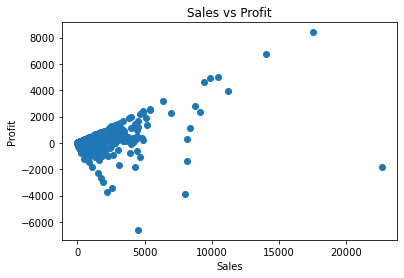

In [20]:
# Sales VS Profit plot

plt.scatter(data.Sales, data.Profit)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

_Let's make a profit vs loss graph. In order to do that we need to make a new column in the dataset._

In [22]:
PL = pd.Series([],dtype=pd.StringDtype())
for i in range (len(data)):
    if data['Profit'][i] > 0:
        PL[i] = 'Profit'
    else:
        PL[i] = 'Loss'

data.insert(loc = 11, column = 'PL', value = PL)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL', ylabel='count'>

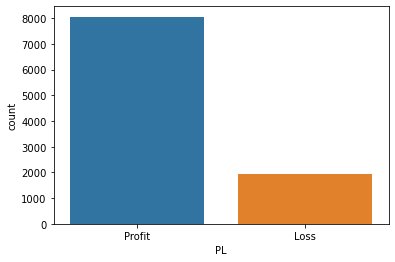

In [23]:
sns.countplot('PL', data=data)

# Profit-Loss BarPlot from Category

_Which categories of product is giving more profit and which categories of product is giving more loss?_

<AxesSubplot:xlabel='PL', ylabel='Sales'>

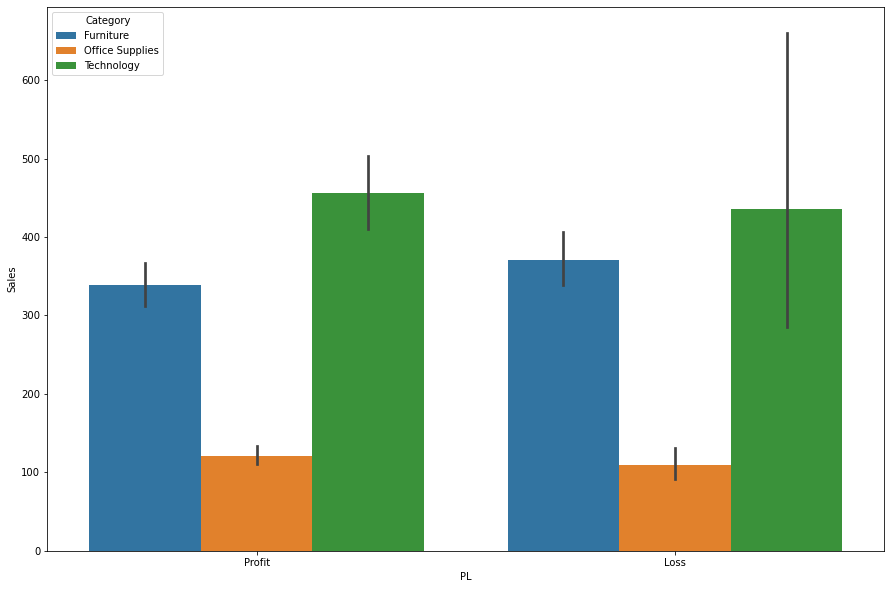

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'PL', y = 'Sales', data = data , hue = 'Category')

_We can see in above plot , Technology products can give us huge profit as well as huge loss at a times. On the other hand in the office supplies, the profit is lower but the loss is also very low that means the risk of doing business is low. Furniture product have a bit higher loss number than profit._

# Profit-Loss BarPlot from Sub-Category

<AxesSubplot:xlabel='PL', ylabel='Sales'>

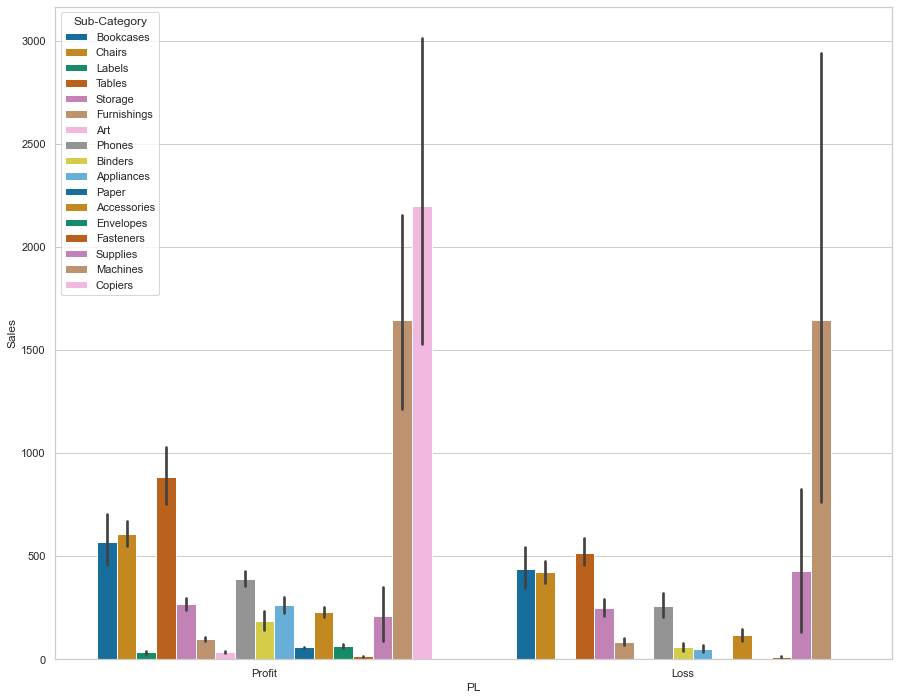

In [27]:
plt.figure(figsize = (15,12))
sns.set(style = 'whitegrid', color_codes = True)
pal = sns.color_palette("colorblind", len(data))
sns.barplot(x = 'PL', y = 'Sales', data = data, palette = pal, hue = 'Sub-Category')

# Discount effect on Profit and Sales of Product

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

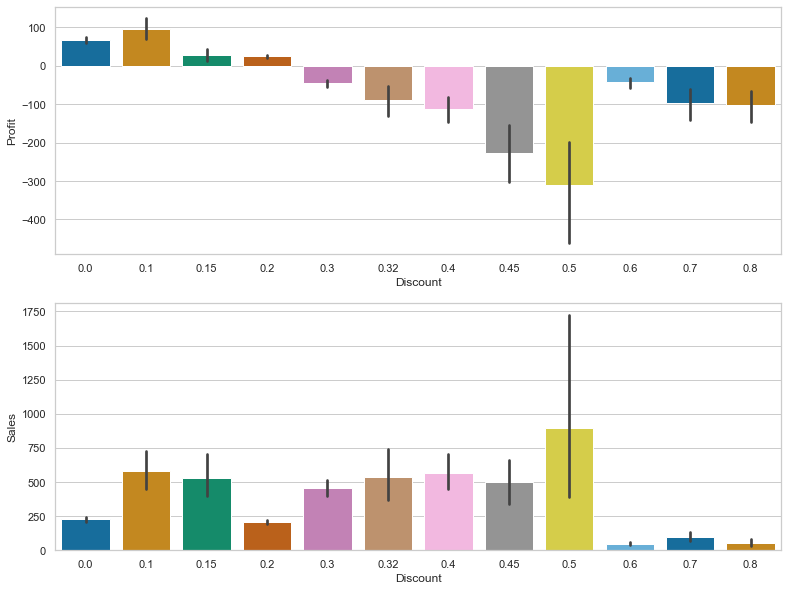

In [31]:
plt.figure(figsize=(13,10))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x = 'Discount', y = 'Profit', palette = pal, data = data)

plt.subplot(2,1,2)
sns.barplot(x = 'Discount', y = 'Sales', palette = pal, data = data)

_We can see the profit is lower when high discount is placed on the other hand discount increases Sales._

# Profits by Region and States

<AxesSubplot:xlabel='Region', ylabel='Profit'>

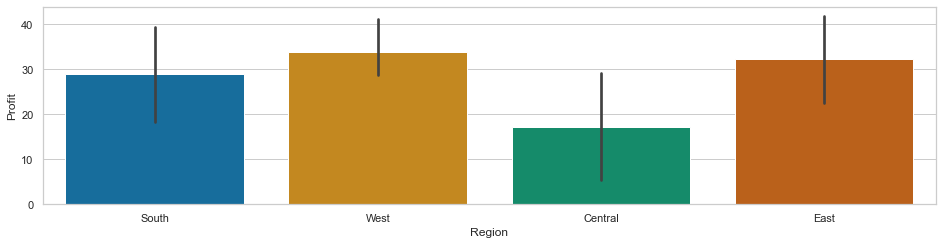

In [32]:
# Profit by Region and States
plt.figure(figsize=(16,8))

pal = sns.color_palette("colorblind", len(data))
plt.subplot(2,1,1)
sns.barplot(x = 'Region', y = 'Profit', palette = pal, data = data)

_Here we can observe that in west region shops makes highest profit and the shops of east comes after that. The company needs to focus on the profit of centeral region shops as its number is very low._

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


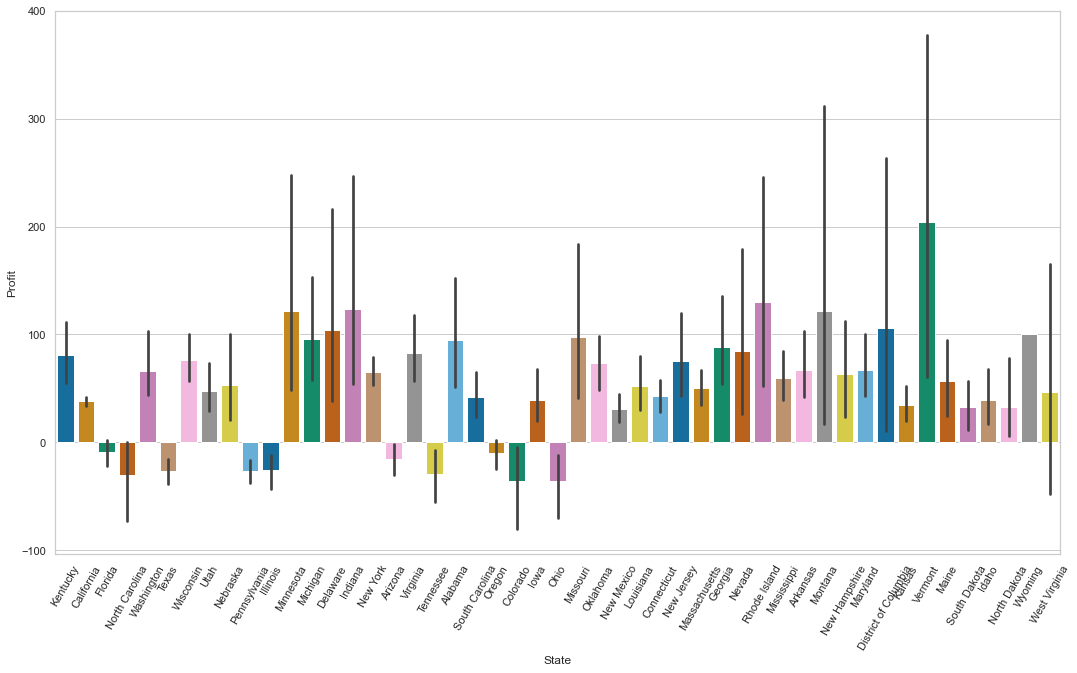

In [33]:
plt.figure(figsize=(18,10))
pal = sns.color_palette("colorblind", len(data))
sns.barplot(x='State', y='Profit', palette = pal, data = data)
plt.xticks(rotation=60)

_We can see that around 10 States are in loss and remaining are in Profit._

# Most used Shipping mode

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

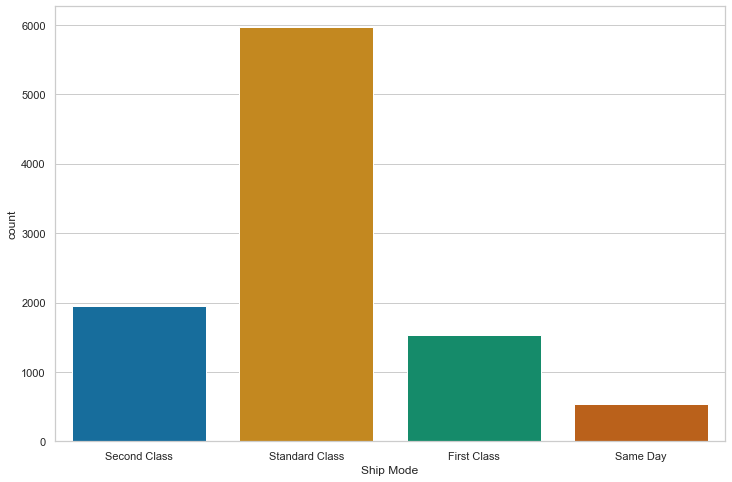

In [34]:
plt.figure(figsize=(12,8))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Ship Mode', palette = pal, data = data)

_Standard Class is the most popular shipping mode._

# Most Popular Segment

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

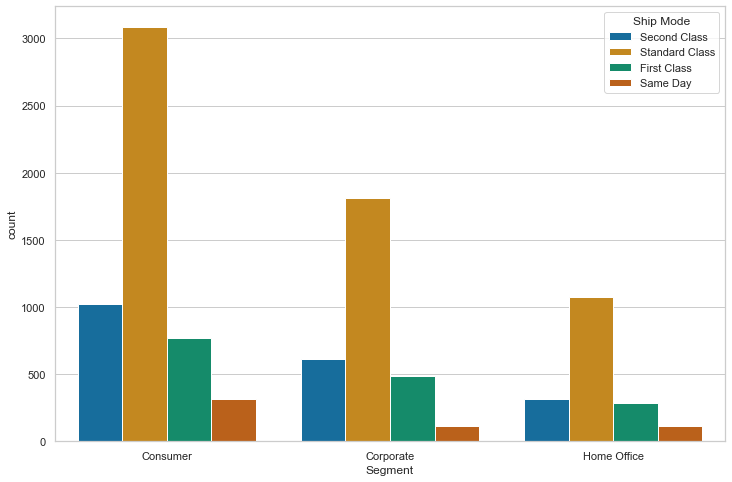

In [35]:
plt.figure(figsize=(12,8))

pal = sns.color_palette("colorblind", len(data))

sns.countplot('Segment', palette = pal, data = data, hue = 'Ship Mode')

_We can refer from the above graph , standard class is popular for all segment as second class is also quite used one._

# Thank You